In [9]:
!pip install fredapi > null


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred


In [4]:
fred_key = '42123b6d2f54c162c85ddecc8f077c78'

# 1. Create the fred object

In [6]:
fred = Fred(api_key = fred_key)

# 2. Search Fred for economic data

In [8]:
fred.search('S&P', limit = 1005)

id realtime_start realtime_end  \
series id                                                        
CSUSHPINSA              CSUSHPINSA     2025-03-09   2025-03-09   
CSUSHPISA                CSUSHPISA     2025-03-09   2025-03-09   
SP500                        SP500     2025-03-09   2025-03-09   
SPCS20RSA                SPCS20RSA     2025-03-09   2025-03-09   
SPCS20RNSA              SPCS20RNSA     2025-03-09   2025-03-09   
...                            ...            ...          ...   
HC01ESTVC1612077  HC01ESTVC1612077     2025-03-09   2025-03-09   
HC01ESTVC1636105  HC01ESTVC1636105     2025-03-09   2025-03-09   
HC01ESTVC1628133  HC01ESTVC1628133     2025-03-09   2025-03-09   
EMVHEALTHCAREPOL  EMVHEALTHCAREPOL     2025-03-09   2025-03-09   
HC01ESTVC1647107  HC01ESTVC1647107     2025-03-09   2025-03-09   

                                                              title  \
series id                                                             
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
CSUSHPISA         S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
SPCS20RSA         S&P CoreLogic Case-Shiller 20-City Composite H...   
SPCS20RNSA        S&P CoreLogic Case-Shiller 20-City Composite H...   
...                                                             ...   
HC01ESTVC1612077  High School Graduate or Higher (5-year estimat...   
HC01ESTVC1636105  High School Graduate or Higher (5-year estimat...   
HC01ESTVC1628133  High School Graduate or Higher (5-year estimat...   
EMVHEALTHCAREPOL  Equity Market Volatility Tracker: Healthcare P...   
HC01ESTVC1647107  High School Graduate or Higher (5-year estimat...   

                 observation_start observation_end     frequency  \
series id                                                          
CSUSHPINSA              1987-01-01      2024-12-01       Monthly   
CSUSHPISA               1987-01-01      2024-12-01       Monthly   
SP500                   2015-03-09      2025-03-07  Daily, Close   
SPCS20RSA               2000-01-01      2024-12-01       Monthly   
SPCS20RNSA              2000-01-01      2024-12-01       Monthly   
...                            ...             ...           ...   
HC01ESTVC1612077        2010-01-01      2023-01-01        Annual   
HC01ESTVC1636105        2010-01-01      2023-01-01        Annual   
HC01ESTVC1628133        2010-01-01      2023-01-01        Annual   
EMVHEALTHCAREPOL        1985-01-01      2025-02-01       Monthly   
HC01ESTVC1647107        2010-01-01      2023-01-01        Annual   

                 frequency_short               units         units_short  \
series id                                                                  
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
CSUSHPISA                      M  Index Jan 2000=100  Index Jan 2000=100   
SP500                          D               Index               Index   
SPCS20RSA                      M  Index Jan 2000=100  Index Jan 2000=100   
SPCS20RNSA                     M  Index Jan 2000=100  Index Jan 2000=100   
...                          ...                 ...                 ...   
HC01ESTVC1612077               A             Percent                   %   
HC01ESTVC1636105               A             Percent                   %   
HC01ESTVC1628133               A             Percent                   %   
EMVHEALTHCAREPOL               M               Index               Index   
HC01ESTVC1647107               A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
CSUSHPINSA        Not Seasonally Adjusted                       NSA   
CSUSHPISA             Seasonally Adjusted                        SA   
SP500             Not Seasonally Adjusted                       NSA   
SPCS20RSA           

In [10]:
sp_search = fred.search('S&P', order_by='popularity')

In [10]:
sp_search.shape

(1000, 15)

In [11]:
sp_search 

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2025-02-23   2025-02-23   
CSUSHPINSA              CSUSHPINSA     2025-02-23   2025-02-23   
SP500                        SP500     2025-02-23   2025-02-23   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2025-02-23   2025-02-23   
BAMLC0A0CM              BAMLC0A0CM     2025-02-23   2025-02-23   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2025-02-23   2025-02-23   
Q03069USQ605NNBR  Q03069USQ605NNBR     2025-02-23   2025-02-23   
CSHICPCZA156NRUG  CSHICPCZA156NRUG     2025-02-23   2025-02-23   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2025-02-23   2025-02-23   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2025-02-23   2025-02-23   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM        ICE BofA US Corporate Index Option-Adjusted Sp...   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHICPCZA156NRUG  Share of Gross Capital Formation at Current Pu...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2025-02-20  Daily, Close   
CSUSHPINSA              1987-01-01      2024-11-01       Monthly   
SP500                   2015-02-23      2025-02-21  Daily, Close   
BAMLH0A0HYM2EY          1996-12-31      2025-02-20  Daily, Close   
BAMLC0A0CM              1996-12-31      2025-02-20  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHICPCZA156NRUG        1990-01-01      2019-01-01        Annual   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short               units         units_short  \
series id                                                                  
BAMLH0A0HYM2                   D             Percent                   %   
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
SP500                          D               Index               Index   
BAMLH0A0HYM2EY                 D             Percent                   %   
BAMLC0A0CM                     D             Percent                   %   
...                          ...                 ...                 ...   
DDDI12SMA156NWDB               A             Percent                   %   
Q03069USQ605NNBR               Q   Thousands of Tons      Thous. Of Tons   
CSHICPCZA156NRUG               A             Percent                   %   
CSHXCPVEA156NRUG               A             Percent                   %   
CSHMCPNPA156NRUG               A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
BAMLH0A0HYM2      Not Seasonally Adjusted                       NSA   
CSUSHPINSA        Not Seasonally Adjusted                       NSA   
SP500             Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY    No

# 3. Pull raw data and plot

In [12]:
sp500 = fred.get_series(series_id='SP500')

<Axes: >

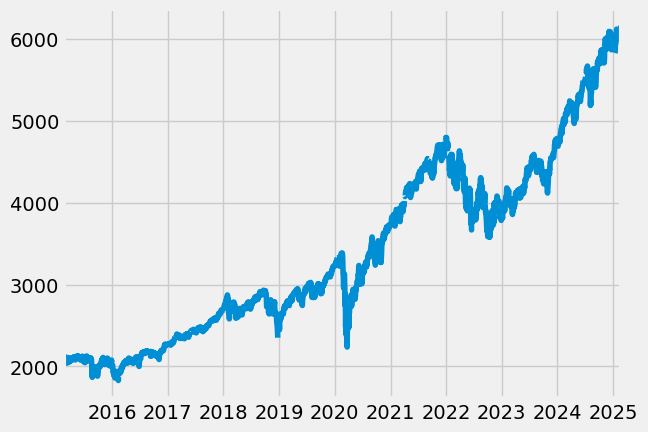

In [14]:
sp500.plot()

In [15]:
sp500.head()
# The first column is the date and the second column is the price of the S&P

2015-02-23    2109.66
2015-02-24    2115.48
2015-02-25    2113.86
2015-02-26    2110.74
2015-02-27    2104.50
dtype: float64

<Axes: title={'center': 'S&P 500'}>

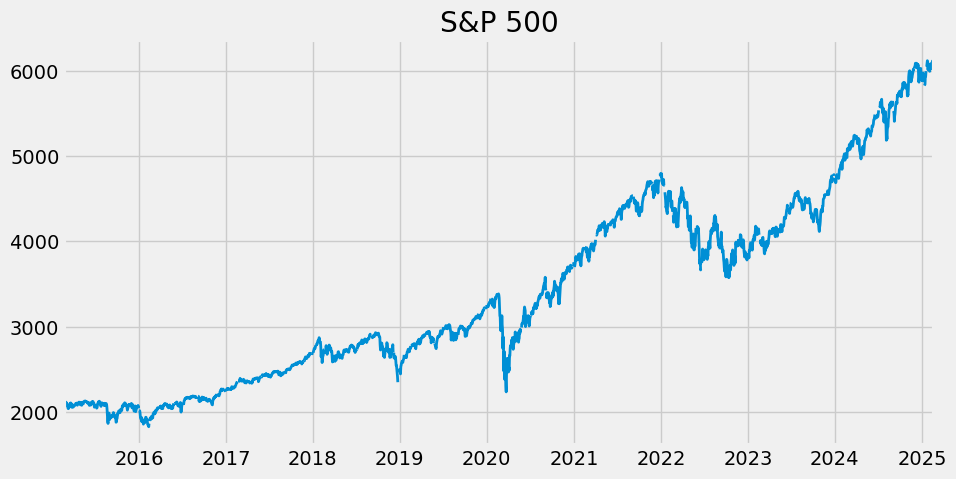

In [16]:
sp500.plot(figsize=(10,5),title = 'S&P 500', lw = 2)
# lw is the line width

In [17]:
type(sp500)

pandas.core.series.Series

# 4. Pull and Join Multiple Data Series

In [14]:
unemp_results = fred.search('unemployment')


In [20]:
unemp_results 

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2025-02-23   2025-02-23   
UNRATENSA                          UNRATENSA     2025-02-23   2025-02-23   
UNEMPLOY                            UNEMPLOY     2025-02-23   2025-02-23   
NROU                                    NROU     2025-02-23   2025-02-23   
CCSA                                    CCSA     2025-02-23   2025-02-23   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2025-02-23   2025-02-23   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2025-02-23   2025-02-23   
LNS14000315                      LNS14000315     2025-02-23   2025-02-23   
LNU04032222                      LNU04032222     2025-02-23   2025-02-23   
LNU04032223                      LNU04032223     2025-02-23   2025-02-23   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2025-01-01   
UNRATENSA                    1948-01-01      2025-01-01   
UNEMPLOY                     1948-01-01      2025-01-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2025-02-08   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2025-01-01   
LNU04032222                  2000-01-01      2025-01-01   
LNU04032223                  2000-01-01      2025-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [16]:
unrate = fred.get_series('UNRATE')

In [22]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

<Axes: >

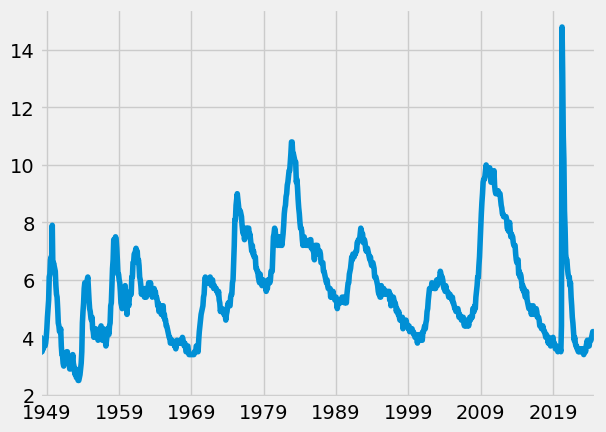

In [23]:
unrate.plot()

In [18]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency','Monthly'))


In [85]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted"')

id realtime_start realtime_end  \
series id                                                                
UNRATE                              UNRATE     2025-03-05   2025-03-05   
LNS14000006                    LNS14000006     2025-03-05   2025-03-05   
UNEMPLOY                          UNEMPLOY     2025-03-05   2025-03-05   
U6RATE                              U6RATE     2025-03-05   2025-03-05   
CAUR                                  CAUR     2025-03-05   2025-03-05   
...                                    ...            ...          ...   
LASST340000000000005  LASST340000000000005     2025-03-05   2025-03-05   
LASRD880000000000005  LASRD880000000000005     2025-03-05   2025-03-05   
LASRD830000000000005  LASRD830000000000005     2025-03-05   2025-03-05   
LNS18100000                    LNS18100000     2025-03-05   2025-03-05   
LNS17200001                    LNS17200001     2025-03-05   2025-03-05   

                                                                  title  \
series id                                                                 
UNRATE                                                Unemployment Rate   
LNS14000006               Unemployment Rate - Black or African American   
UNEMPLOY                                             Unemployment Level   
U6RATE                Total Unemployed, Plus All Persons Marginally ...   
CAUR                                    Unemployment Rate in California   
...                                                                 ...   
LASST340000000000005                     Employed Persons in New Jersey   
LASRD880000000000005       Employed Persons in Mountain Census Division   
LASRD830000000000005  Employed Persons in East North Central Census ...   
LNS18100000                      Marginal Inflows to Not in Labor Force   
LNS17200001           Labor Force Flows Not in Labor Force to Employ...   

                     observation_start observation_end frequency  \
series id                                                          
UNRATE                      1948-01-01      2025-01-01   Monthly   
LNS14000006                 1972-01-01      2025-01-01   Monthly   
UNEMPLOY                    1948-01-01      2025-01-01   Monthly   
U6RATE                      1994-01-01      2025-01-01   Monthly   
CAUR                        1976-01-01      2024-12-01   Monthly   
...                                ...             ...       ...   
LASST340000000000005        1976-01-01      2024-12-01   Monthly   
LASRD880000000000005        1976-01-01      2024-12-01   Monthly   
LASRD830000000000005        1976-01-01      2024-12-01   Monthly   
LNS18100000                 1990-02-01      2025-01-01   Monthly   
LNS17200001                 1990-02-01      2025-01-01   Monthly   

                     frequency_short                 units        units_short  \
series id                                                                       
UNRATE                             M               Percent                  %   
LNS14000006                        M               Percent                  %   
UNEMPLOY                           M  Thousands of Persons  Thous. of Persons   
U6RATE                             M               Percent                  %   
CAUR                               M               Percent                  %   
...                              ...                   ...                ...   
LASST340000000000005               M               Persons            Persons   
LASRD880000000000005               M               Persons            Persons   
LASRD830000000000005               M               Persons            Persons   
LNS18100000                        M  Thousands of Persons  Thous. of Persons   
LNS17200001                        M  Thousands of Persons  Thous. of Persons   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE              

In [20]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [151]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2025-03-05   2025-03-05   
LNS14000006            LNS14000006     2025-03-05   2025-03-05   
CAUR                          CAUR     2025-03-05   2025-03-05   
TXUR                          TXUR     2025-03-05   2025-03-05   
M0892AUSM156SNBR  M0892AUSM156SNBR     2025-03-05   2025-03-05   
LNS14000024            LNS14000024     2025-03-05   2025-03-05   
LNS14000031            LNS14000031     2025-03-05   2025-03-05   
M0892BUSM156SNBR  M0892BUSM156SNBR     2025-03-05   2025-03-05   
NYUR                          NYUR     2025-03-05   2025-03-05   
U2RATE                      U2RATE     2025-03-05   2025-03-05   
FLUR                          FLUR     2025-03-05   2025-03-05   
LNS14000002            LNS14000002     2025-03-05   2025-03-05   
LNS14000009            LNS14000009     2025-03-05   2025-03-05   
LNS14000003            LNS14000003     2025-03-05   2025-03-05   
PAUR                          PAUR     2025-03-05   2025-03-05   
OHUR                          OHUR     2025-03-05   2025-03-05   
LNS14000001            LNS14000001     2025-03-05   2025-03-05   
LNS14027660            LNS14027660     2025-03-05   2025-03-05   
MIUR                          MIUR     2025-03-05   2025-03-05   
LNS14027662            LNS14027662     2025-03-05   2025-03-05   
ALUR                          ALUR     2025-03-05   2025-03-05   
LNS14024887            LNS14024887     2025-03-05   2025-03-05   
MAUR                          MAUR     2025-03-05   2025-03-05   
NCUR                          NCUR     2025-03-05   2025-03-05   
ILUR                          ILUR     2025-03-05   2025-03-05   
NJUR                          NJUR     2025-03-05   2025-03-05   
GAUR                          GAUR     2025-03-05   2025-03-05   
COUR                          COUR     2025-03-05   2025-03-05   
AZUR                          AZUR     2025-03-05   2025-03-05   
WIUR                          WIUR     2025-03-05   2025-03-05   
VAUR                          VAUR     2025-03-05   2025-03-05   
KYUR                          KYUR     2025-03-05   2025-03-05   
LRUN64TTUSM156S    LRUN64TTUSM156S     2025-03-05   2025-03-05   
SCUR                          SCUR     2025-03-05   2025-03-05   
NMUR                          NMUR     2025-03-05   2025-03-05   
MNUR                          MNUR     2025-03-05   2025-03-05   
TNUR                          TNUR     2025-03-05   2025-03-05   
LNS14032183            LNS14032183     2025-03-05   2025-03-05   
LNS14000012            LNS14000012     2025-03-05   2025-03-05   
WAUR                          WAUR     2025-03-05   2025-03-05   
LNS14027659            LNS14027659     2025-03-05   2025-03-05   
MDUR                          MDUR     2025-03-05   2025-03-05   
ORUR                          ORUR     2025-03-05   2025-03-05   
WVUR                          WVUR     2025-03-05   2025-03-05   
NVUR                          NVUR     2025-03-05   2025-03-05   
ARUR                          ARUR     2025-03-05   2025-03-05   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
LNS14000024                      Unemployment Rate - 20 Yrs. & over   
LNS14000031       Unemployment Rate - 20 Yrs. & over, Black or A...   
M0892BUSM156SNBR                Unemployment Rate for United States   
NYUR                                  Unemployment Rate in New York   
U2RATE                         Unemployment Rate - Job Losers (U-2)   
FLUR       

In [27]:
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
U6RATE              Total Unemployed, Plus All Persons Marginally ...
CAUR                                  Unemployment Rate in California
TXUR                                       Unemployment Rate in Texas
M0892AUSM156SNBR                  Unemployment Rate for United States
LNS14000024                        Unemployment Rate - 20 Yrs. & over
LNS14000031         Unemployment Rate - 20 Yrs. & over, Black or A...
M0892BUSM156SNBR                  Unemployment Rate for United States
NYUR                                    Unemployment Rate in New York
U2RATE                           Unemployment Rate - Job Losers (U-2)
FLUR                                     Unemployment Rate in Florida
LNS14000002                                 Unemployment Rate - Women
LNS14000009                    Unemployment Rate - Hispanic or Latino
LNS1400000

In [29]:
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE               True
LNS14000006          True
U6RATE              False
CAUR                 True
TXUR                 True
M0892AUSM156SNBR     True
LNS14000024          True
LNS14000031          True
M0892BUSM156SNBR     True
NYUR                 True
U2RATE               True
FLUR                 True
LNS14000002          True
LNS14000009          True
LNS14000003          True
PAUR                 True
OHUR                 True
U4RATE              False
LNS14000001          True
LNS14027660          True
MIUR                 True
LNS14027662          True
ALUR                 True
LNS14024887          True
MAUR                 True
NCUR                 True
ILUR                 True
NJUR                 True
GAUR                 True
COUR                 True
U1RATE              False
AZUR                 True
WIUR                 True
VAUR                 True
KYUR                 True
U5RATE              False
LRUN64TTUSM156S      True
SCUR                 True
NM

In [22]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [64]:
# Go through each of these IDs and pull the series data down

In [26]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [28]:
#Going through each of the IDs
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break

In [37]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

In [39]:
results.to_frame(name=myid)

UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2024-09-01     4.1
2024-10-01     4.1
2024-11-01     4.2
2024-12-01     4.1
2025-01-01     4.0

[925 rows x 1 columns]

In [30]:
# Making a list to store all the results in

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

# all_results becomes a list of dataframes

In [95]:
all_results[3]

CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2024-08-01   5.3
2024-09-01   5.3
2024-10-01   5.4
2024-11-01   5.4
2024-12-01   5.5

[588 rows x 1 columns]

In [45]:
type(all_results)

list

In [97]:
# Concatination the contents of the list


pd.concat(all_results, axis = 1)

UNRATE  LNS14000006  U6RATE  CAUR  TXUR  M0892AUSM156SNBR  \
1929-04-01     NaN          NaN     NaN   NaN   NaN              0.69   
1929-05-01     NaN          NaN     NaN   NaN   NaN              1.65   
1929-06-01     NaN          NaN     NaN   NaN   NaN              2.06   
1929-07-01     NaN          NaN     NaN   NaN   NaN              0.79   
1929-08-01     NaN          NaN     NaN   NaN   NaN              0.04   
...            ...          ...     ...   ...   ...               ...   
2024-09-01     4.1          5.7     7.7   5.3   4.1               NaN   
2024-10-01     4.1          5.7     7.7   5.4   4.1               NaN   
2024-11-01     4.2          6.4     7.7   5.4   4.2               NaN   
2024-12-01     4.1          6.1     7.5   5.5   4.2               NaN   
2025-01-01     4.0          6.2     7.5   NaN   NaN               NaN   

            LNS14000024  LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  \
1929-04-01          NaN          NaN               NaN   NaN     NaN   NaN   
1929-05-01          NaN          NaN               NaN   NaN     NaN   NaN   
1929-06-01          NaN          NaN               NaN   NaN     NaN   NaN   
1929-07-01          NaN          NaN               NaN   NaN     NaN   NaN   
1929-08-01          NaN          NaN               NaN   NaN     NaN   NaN   
...                 ...          ...               ...   ...     ...   ...   
2024-09-01          3.7          5.2               NaN   4.4     1.9   3.3   
2024-10-01          3.8          5.7               NaN   4.4     2.0   3.3   
2024-11-01          3.9          6.0               NaN   4.4     2.0   3.4   
2024-12-01          3.7          5.6               NaN   4.4     1.9   3.4   
2025-01-01          3.7          6.9               NaN   NaN     1.9   NaN   

            LNS14000002  LNS14000009  LNS14000003  PAUR  OHUR  U4RATE  \
1929-04-01          NaN          NaN          NaN   NaN   NaN     NaN   
1929-05-01          NaN          NaN          NaN   NaN   NaN     NaN   
1929-06-01          NaN          NaN          NaN   NaN   NaN     NaN   
1929-07-01          NaN          NaN          NaN   NaN   NaN     NaN   
1929-08-01          NaN          NaN          NaN   NaN   NaN     NaN   
...                 ...          ...          ...   ...   ...     ...   
2024-09-01          3.9          5.1          3.7   3.4   4.5     4.3   
2024-10-01          4.0          5.1          3.8   3.4   4.3     4.4   
2024-11-01          4.2          5.3          3.8   3.5   4.3     4.5   
2024-12-01          4.1          5.1          3.6   3.6   4.4     4.4   
2025-01-01          4.0          4.8          3.5   NaN   NaN     4.3   

            LNS14000001  LNS14027660  MIUR  LNS14027662  ALUR  LNS14024887  \
1929-04-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-05-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-06-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-07-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-08-01          NaN          NaN   NaN          NaN   NaN          NaN   
...                 ...          ...   ...          ...   ...          ...   
2024-09-01          4.2          4.0   4.5          2.3   2.9          9.2   
2024-10-01          4.2          4.0   4.6          2.5   2.9          9.5   
2024-11-01          4.3          4.6   4.8          2.5   3.1          9.4   
2024-12-01          4.1          4.3   5.0          2.4   3.3          9.0   
2025-01-01          4.0          4.5   NaN          2.3   NaN          9.0   

            MAUR  NCUR  ILUR  NJUR  GAUR  COUR  U1RATE  AZUR  WIUR  VAUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   
1929

In [32]:
uemp_results = pd.concat(all_results, axis = 1)

In [94]:
uemp_results

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-10-01   5.5   4.2   4.4   3.5   3.7   4.5   5.2   3.3   4.2   3.7   4.9   
2024-11-01   5.5   4.2   4.4   3.5   3.7   4.5   5.2   3.3   4.1   3.7   4.9   
2024-12-01   5.5   4.2   4.4   3.4   3.7   4.5   5.2   3.3   4.1   3.7   4.9   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-10-01   4.6   3.6   4.6   3.9   3.1   2.9   5.4   4.5   4.4   3.0   3.7   
2024-11-01   4.6   3.6   4.6   3.9   3.1   2.9   5.4   4.4   4.4   3.0   3.7   
2024-12-01   4.6   3.6   4.6   3.8   3.1   2.9   5.3   4.4   4.3   3.0   3.7   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...  
2024-10-01   4.4   3.2   4.3   4.1   5.8   3.6  
2024-11-01   4.4   3.1   4.3   4.1   5.8   3.6  
2024-12-01   4.4   3.1   4.3   4.1   5.8   3.6  
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN  
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN  

[1139 rows x 28 columns]

In [34]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [36]:
# Dropping the first column because it is not a state-wide unemployment rate
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)


In [133]:
uemp_states

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-09-01   5.3   4.1   4.4   3.3   3.4   4.5   4.5   2.9   3.8   3.8   5.3   
2024-10-01   5.4   4.1   4.4   3.3   3.4   4.3   4.6   2.9   3.9   3.7   5.3   
2024-11-01   5.4   4.2   4.4   3.4   3.5   4.3   4.8   3.1   4.0   3.7   5.3   
2024-12-01   5.5   4.2   4.4   3.4   3.6   4.4   5.0   3.3   4.1   3.7   5.2   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-09-01   4.7   3.6   4.0   3.5   2.9   2.9   4.9   4.5   4.2   3.4   3.2   
2024-10-01   4.7   3.6   4.1   3.6   2.9   2.9   5.0   4.7   4.3   3.4   3.3   
2024-11-01   4.6   3.7   4.3   3.7   2.9   3.0   5.1   4.8   4.4   3.5   3.5   
2024-12-01   4.6   3.7   4.4   3.8   3.0   3.0   5.2   4.7   4.4   3.3   3.6   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...  
2024-09-01   4.8   2.9   4.0   4.2   5.6   3.3  
2024-10-01   4.7   3.0   4.0   4.2   5.7   3.3  
2024-11-01   4.6   3.1   4.0   4.2   5.7   3.3  
2024-12-01   4.5   3.1   4.1   4.2   5.7   3.4  
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN  

[1138 rows x 28 columns]

In [38]:
# This will tell us how many missing values there are for each date
uemp_states.isna().sum(axis = 1)

1929-04-01    28
1929-05-01    28
1929-06-01    28
1929-07-01    28
1929-08-01    28
              ..
2024-10-01     0
2024-11-01     0
2024-12-01     0
2025-01-01    28
2025-02-01    28
Length: 1139, dtype: int64

<Axes: >

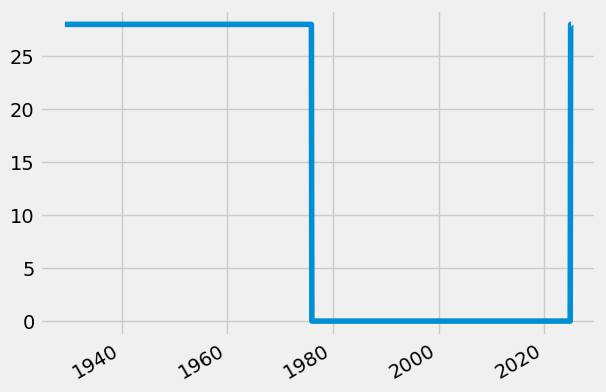

In [40]:
uemp_states.isna().sum(axis = 1).plot()

In [42]:
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [44]:
[c for c in uemp_states.columns]

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'Ohio',
 'Michigan',
 'Alabama',
 'Massachusetts',
 'North Carolina',
 'Illinois',
 'New Jersey',
 'Georgia',
 'Colorado',
 'Arizona',
 'Wisconsin',
 'Virginia',
 'Kentucky',
 'South Carolina',
 'New Mexico',
 'Minnesota',
 'Tennessee',
 'Washington',
 'Maryland',
 'Oregon',
 'West Virginia',
 'Nevada',
 'Arkansas']

In [46]:
uemp_states.columns 

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas'],
      dtype='object')

In [48]:
uemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.6           8.1   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.0    5.9      10.2      9.5           8.1   7.9   
1976-05-01         8.9    6.0      10.2      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-08-01         5.4    4.2       4.4      3.4           3.6   4.4   
2024-09-01         5.5    4.2       4.4      3.5           3.7   4.4   
2024-10-01         5.5    4.2       4.4      3.5           3.7   4.5   
2024-11-01         5.5    4.2       4.4      3.5           3.7   4.5   
2024-12-01         5.5    4.2       4.4      3.4           3.7   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.7           10.6             6.5       6.6   
1976-02-01       9.9      6.6           10.6             6.5       6.6   
1976-03-01       9.9      6.6           10.6             6.5       6.6   
1976-04-01       9.8      6.5           10.4             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-08-01       5.0      3.1            4.2             3.7       5.0   
2024-09-01       5.1      3.3            4.2             3.7       5.0   
2024-10-01       5.2      3.3            4.2             3.7       4.9   
2024-11-01       5.2      3.3            4.1             3.7       4.9   
2024-12-01       5.2      3.3            4.1             3.7       4.9   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.2      8.4       5.8     10.2        5.8       6.0   
1976-02-01        10.2      8.4       5.8     10.2        5.8       6.0   
1976-03-01        10.2      8.3       5.7     10.2        5.8       6.0   
1976-04-01        10.3      8.2       5.6     10.0        5.7       5.9   
1976-05-01        10.3      8.1       5.6      9.8        5.6       5.8   
...                ...      ...       ...      ...        ...       ...   
2024-08-01         4.6      3.6       4.4      3.7        3.0       2.9   
2024-09-01         4.6      3.6       4.5      3.8        3.0       2.9   
2024-10-01         4.6      3.6       4.6      3.9        3.1       2.9   
2024-11-01         4.6      3.6       4.6      3.9        3.1       2.9   
2024-12-01         4.6      3.6       4.6      3.8        3.1       2.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.3         8.6        5.9        6.0   
1976-02-01       5.6             7.3         8.6        5.9        6.0   
1976-03-01       5.6             7.3         8.6        5.8        6.0   
1976-04-01       5.6             7.1         8.6        5.7        6.0   
1976-05-01       5.5             7.0         8.6        5.6        5.9   
...              ...             ...         ...        ...        ...   
2024-08-01       5.2             4.6         4.3        3.2        3.6   
2024-09-01       5.3             4.5         4.3        3.1        3.7   
2024-10-01       5.4             4.5         4.4        3.0        3.7   
2024-11-01       5.4             4.4         4.4        3.0        3.7   
2024-12-01       5.3             4.4         4.3        3.0        3.7   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  
1976-01-01         8.5       6.5     9.5            7.4     9.2       7.3  
1976-02-01         8.5       6.5     9.5            7.4     9.2       7.3  
1976-03-01         8.5       6.5     9.4            7.4     9.2       7.3  
1976-04-01         8.5       6.5     9.3            7.4     9.0       7.2  
1976-05-01         8.5       6.6     9.1            7.4     8.8       7.1  
...         

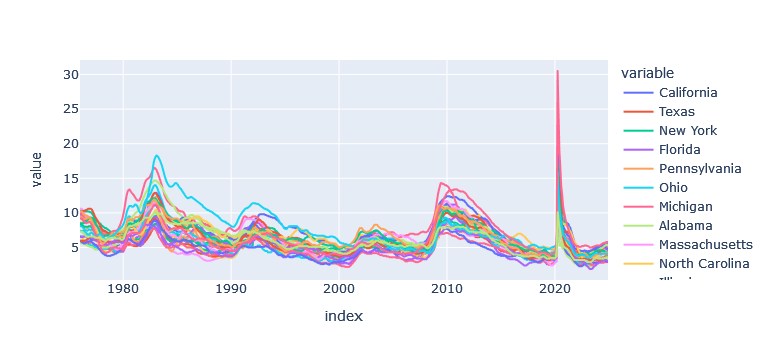

In [50]:
# Plot states unemployment rate
px.line(uemp_states)

# Pull April 2020 unemployment rate per state 

In [52]:
uemp_states.loc[uemp_states.index == '2020-04-01']  

California  Texas  New York  Florida  Pennsylvania  Ohio  \
2020-04-01        16.1   12.8      15.7     13.3          16.1  16.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
2020-04-01      22.7     13.8           17.8            14.2      18.3   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
2020-04-01        15.0     12.5      11.2     13.8       14.1      11.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
2020-04-01      16.7            11.7         9.0        8.9       15.7   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  
2020-04-01        17.1       9.0    13.7           15.8    30.5      10.1

In [54]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T.sort_values('2020-04-01') 


2020-04-01
Minnesota              8.9
Maryland               9.0
New Mexico             9.0
Arkansas              10.1
Colorado              11.2
South Carolina        11.7
Virginia              11.9
Georgia               12.5
Texas                 12.8
Florida               13.3
Oregon                13.7
Alabama               13.8
Arizona               13.8
Wisconsin             14.1
North Carolina        14.2
New Jersey            15.0
Tennessee             15.7
New York              15.7
West Virginia         15.8
California            16.1
Pennsylvania          16.1
Ohio                  16.5
Kentucky              16.7
Washington            17.1
Massachusetts         17.8
Illinois              18.3
Michigan              22.7
Nevada                30.5

<Axes: title={'center': 'Unemployment Rate by State, April 2020'}>

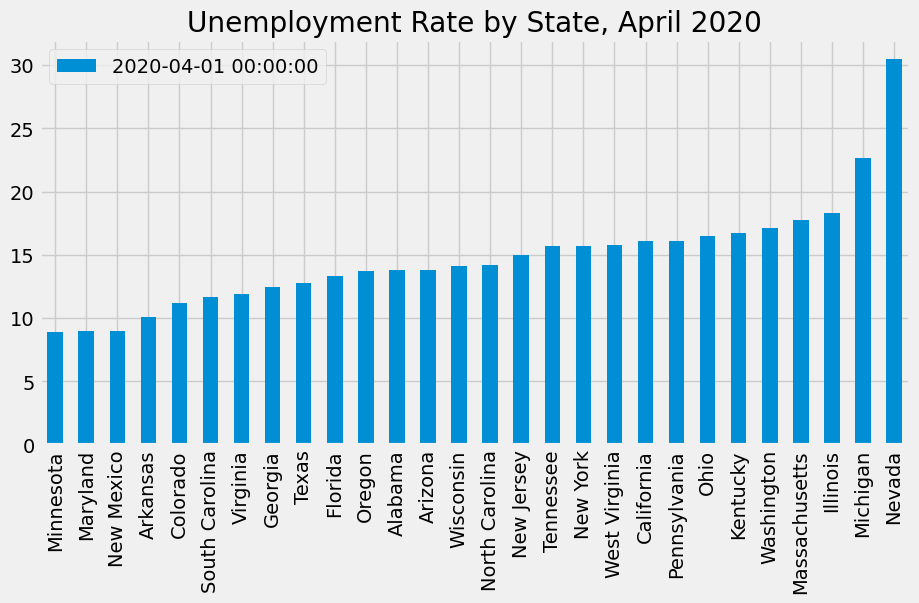

In [56]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind = 'bar', figsize = (10,5) , title = 'Unemployment Rate by State, April 2020')

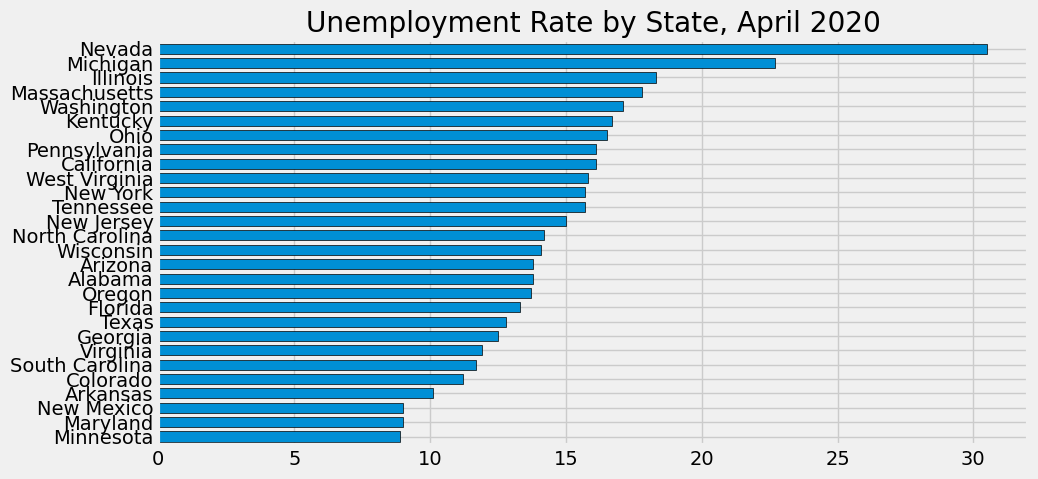

In [58]:
# We can remove the legend from the plot

ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind = 'barh', figsize = (10,5) , width=0.7, edgecolor='black', title='Unemployment Rate by State, April 2020')

ax.legend().remove()
plt.show()

# Pull Participation Rate

In [60]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [62]:
part_df.tail()

id realtime_start realtime_end  \
series id                                                      
LRIN74MAUSM156S  LRIN74MAUSM156S     2025-03-09   2025-03-09   
LRIN64MAUSM156S  LRIN64MAUSM156S     2025-03-09   2025-03-09   
LRIN64FEUSM156S  LRIN64FEUSM156S     2025-03-09   2025-03-09   
LRIN55FEUSM156S  LRIN55FEUSM156S     2025-03-09   2025-03-09   
LRIN25FEUSM156S  LRIN25FEUSM156S     2025-03-09   2025-03-09   

                                                             title  \
series id                                                            
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
LRIN74MAUSM156S        1981-01-01      2025-01-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2025-01-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2025-01-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2025-01-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2025-01-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short               last_updated  \
series id                                                              
LRIN74MAUSM156S                        SA  2025-02-17 13:49:07-06:00   
LRIN64MAUSM156S                        SA  2025-02-17 13:49:12-06:00   
LRIN64FEUSM156S                        SA  2025-02-17 13:49:15-06:00   
LRIN55FEUSM156S                        SA  2025-02-17 13:49:21-06:00   
LRIN25FEUSM156S                        SA  2025-02-17 13:49:27-06:00   

                popularity                                              notes  
series id                                                                      
LRIN74MAUSM156S          1  OECD Data Filters:  REF_AREA: USA MEASURE: OLF...  
LRIN64MAUSM156S          1  OECD Data Filters:  REF_AREA: USA MEASURE: OLF...  
LRIN64FEUSM156S          1  OECD Data Filters:  REF_AREA: USA MEASURE: OLF...  
LRIN55FEUSM156S          0  OECD Data Filters:  REF_AREA: USA MEASURE: OLF...  
LRIN25FEUSM156S          0  OECD Data Filters:  REF_AREA: USA MEASURE: OLF...

In [195]:
part_df.shape

(109, 15)

In [66]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [68]:
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25MAUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25FEUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA06': 'California',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Participation Ra

In [72]:
part_df.index

Index(['CIVPART', 'LNS11300060', 'LNS11300002', 'LNS11300001', 'LNS11324230',
       'LNS11300012', 'LNS11300006', 'LRAC25MAUSM156S', 'LNS11300036',
       'LRAC25FEUSM156S',
       ...
       'LRIN25TTUSM156S', 'LRIN55MAUSM156S', 'LRIN24MAUSM156S',
       'LRIN24FEUSM156S', 'LRIN74FEUSM156S', 'LRIN74MAUSM156S',
       'LRIN64MAUSM156S', 'LRIN64FEUSM156S', 'LRIN55FEUSM156S',
       'LRIN25FEUSM156S'],
      dtype='object', name='series id', length=109)

In [76]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1)

In [78]:
part_states

CIVPART  LNS11300060  LNS11300002  LNS11300001  LNS11324230  \
1948-01-01     58.6         64.2         32.0         86.7         43.0   
1948-02-01     58.9         64.6         32.4         87.0         43.3   
1948-03-01     58.5         64.3         32.1         86.3         43.0   
1948-04-01     59.0         64.8         33.0         86.6         43.4   
1948-05-01     58.3         64.3         32.0         86.1         43.2   
...             ...          ...          ...          ...          ...   
2024-10-01     62.5         83.5         57.3         68.1         38.6   
2024-11-01     62.5         83.5         57.3         67.9         38.4   
2024-12-01     62.5         83.4         57.4         67.9         38.3   
2025-01-01     62.6         83.5         57.5         68.0         38.4   
2025-02-01     62.4         83.5         57.5         67.6         38.1   

            LNS11300012  LNS11300006  LRAC25MAUSM156S  LNS11300036  \
1948-01-01         53.2          NaN              NaN         64.4   
1948-02-01         53.7          NaN              NaN         64.9   
1948-03-01         54.1          NaN              NaN         63.3   
1948-04-01         54.2          NaN              NaN         63.7   
1948-05-01         50.9          NaN              NaN         63.7   
...                 ...          ...              ...          ...   
2024-10-01         35.8         62.9             89.3         71.8   
2024-11-01         36.3         62.4             89.3         71.5   
2024-12-01         37.5         62.4             89.0         71.9   
2025-01-01         36.3         62.5             89.4         72.4   
2025-02-01         37.2         62.7              NaN         71.3   

            LRAC25FEUSM156S  LNS11327662  LBSSA06  LNS11300028  LNS11300031  \
1948-01-01              NaN          NaN      NaN          NaN          NaN   
1948-02-01              NaN          NaN      NaN          NaN          NaN   
1948-03-01              NaN          NaN      NaN          NaN          NaN   
1948-04-01              NaN          NaN      NaN          NaN          NaN   
1948-05-01              NaN          NaN      NaN          NaN          NaN   
...                     ...          ...      ...          ...          ...   
2024-10-01             77.8         72.5     62.1         70.1         69.2   
2024-11-01             77.7         72.5     62.1         69.9         68.7   
2024-12-01             77.9         72.1     62.1         69.8         68.2   
2025-01-01             77.7         72.4      NaN         69.9         69.0   
2025-02-01              NaN         71.8      NaN         69.4         68.3   

            LBSSA01  LNS11300003  LNS11327660  LBSSA36  LNS11300029  LBSSA26  \
1948-01-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-05-01      NaN          NaN          NaN      NaN          NaN      NaN   
...             ...          ...          ...      ...          ...      ...   
2024-10-01     57.6         62.2         56.7     61.2         57.6     62.2   
2024-11-01     57.6         62.1         56.9     61.2         57.6     62.2   
2024-12-01     57.7         62.2         56.9     61.2         57.6     62.2   
2025-01-01      NaN         62.3         57.1      NaN         57.8      NaN   
2025-02-01      NaN         62.1         56.2      NaN         57.8      NaN   

            LBSSA28  LNS11300009  LNS11300032  LBSSA48  LBSSA12  LBSSA21  \
1948-01-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN  

In [80]:
for i in part_states:
    print(len(i))

7
11
11
11
11
11
11
15
11
15
11
7
11
11
7
11
11
7
11
7
7
11
11
7
7
7
7
7
7
7
7
7
7
7
11
7
7
7
7
7
7
7
7
7
7
11
7
15
7
15
7
7
11
7
7
7
11
7
7
7
7
7
7
7
7
7
7
7
7
7
15
7
11
7
7
7
7
11
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [250]:
part_states

CIVPART  LNS11300060  LNS11300002  LNS11300001  LNS11324230  \
1948-01-01     58.6         64.2         32.0         86.7         43.0   
1948-02-01     58.9         64.6         32.4         87.0         43.3   
1948-03-01     58.5         64.3         32.1         86.3         43.0   
1948-04-01     59.0         64.8         33.0         86.6         43.4   
1948-05-01     58.3         64.3         32.0         86.1         43.2   
...             ...          ...          ...          ...          ...   
2024-09-01     62.7         83.8         57.6         68.1         38.5   
2024-10-01     62.5         83.5         57.3         68.1         38.6   
2024-11-01     62.5         83.5         57.3         67.9         38.4   
2024-12-01     62.5         83.4         57.4         67.9         38.3   
2025-01-01     62.6         83.5         57.5         68.0         38.4   

            LNS11300012  LNS11300006  LRAC25MAUSM156S  LNS11300036  \
1948-01-01         53.2          NaN              NaN         64.4   
1948-02-01         53.7          NaN              NaN         64.9   
1948-03-01         54.1          NaN              NaN         63.3   
1948-04-01         54.2          NaN              NaN         63.7   
1948-05-01         50.9          NaN              NaN         63.7   
...                 ...          ...              ...          ...   
2024-09-01         37.2         62.8             89.5         70.7   
2024-10-01         35.8         62.9             89.3         71.8   
2024-11-01         36.3         62.4             89.3         71.5   
2024-12-01         37.5         62.4             89.0         71.9   
2025-01-01         36.3         62.5             89.4         72.4   

            LRAC25FEUSM156S  LNS11327662  LBSSA06  LNS11300028  LNS11300031  \
1948-01-01              NaN          NaN      NaN          NaN          NaN   
1948-02-01              NaN          NaN      NaN          NaN          NaN   
1948-03-01              NaN          NaN      NaN          NaN          NaN   
1948-04-01              NaN          NaN      NaN          NaN          NaN   
1948-05-01              NaN          NaN      NaN          NaN          NaN   
...                     ...          ...      ...          ...          ...   
2024-09-01             78.1         72.9     62.1         70.1         69.3   
2024-10-01             77.8         72.5     62.1         70.1         69.2   
2024-11-01             77.7         72.5     62.1         69.9         68.7   
2024-12-01             77.9         72.1     62.1         69.8         68.2   
2025-01-01             77.7         72.4      NaN         69.9         69.0   

            LBSSA01  LNS11300003  LNS11327660  LBSSA36  LNS11300029  LBSSA26  \
1948-01-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-05-01      NaN          NaN          NaN      NaN          NaN      NaN   
...             ...          ...          ...      ...          ...      ...   
2024-09-01     57.5         62.4         56.7     61.2         57.9     62.3   
2024-10-01     57.6         62.2         56.7     61.2         57.6     62.2   
2024-11-01     57.6         62.1         56.9     61.2         57.6     62.2   
2024-12-01     57.7         62.2         56.9     61.2         57.6     62.2   
2025-01-01      NaN         62.3         57.1      NaN         57.8      NaN   

            LBSSA28  LNS11300009  LNS11300032  LBSSA48  LBSSA12  LBSSA21  \
1948-01-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN  

In [82]:
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25MAUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25FEUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA06': 'California',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Participation Ra

In [84]:
part_states = pd.concat(all_results, axis=1)

In [86]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [88]:
part_states.columns

Index(['Labor Force Participation Rate',
       'Labor Force Participation Rate - 25-54 Yrs.',
       'Labor Force Participation Rate - Women',
       'Labor Force Participation Rate - Men',
       'Labor Force Participation Rate - 55 Yrs. & over',
       'Labor Force Participation Rate - 16-19 Yrs.',
       'Labor Force Participation Rate - Black or African American',
       'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
       'Labor Force Participation Rate - 20-24 Yrs.',
       'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
       ...
       'Infra-Annual Labor Statistics: Inactivity Rate Total: From 25 to 54 Years for United States',
       'Infra-Annual Labor Statistics: Inactivity Rate Male: From 55 to 64 Years for United States',
       'Infra-Annual Labor Statistics: Inactivity Rate Male: From 15 to 24 Years for United States',
       'Infra-Annual Labo

In [96]:
# Debugging

In [180]:
uemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.6           8.1   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.0    5.9      10.2      9.5           8.1   7.9   
1976-05-01         8.9    6.0      10.2      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-08-01         5.4    4.2       4.4      3.4           3.6   4.4   
2024-09-01         5.5    4.2       4.4      3.5           3.7   4.4   
2024-10-01         5.5    4.2       4.4      3.5           3.7   4.5   
2024-11-01         5.5    4.2       4.4      3.5           3.7   4.5   
2024-12-01         5.5    4.2       4.4      3.4           3.7   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.7           10.6             6.5       6.6   
1976-02-01       9.9      6.6           10.6             6.5       6.6   
1976-03-01       9.9      6.6           10.6             6.5       6.6   
1976-04-01       9.8      6.5           10.4             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-08-01       5.0      3.1            4.2             3.7       5.0   
2024-09-01       5.1      3.3            4.2             3.7       5.0   
2024-10-01       5.2      3.3            4.2             3.7       4.9   
2024-11-01       5.2      3.3            4.1             3.7       4.9   
2024-12-01       5.2      3.3            4.1             3.7       4.9   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.2      8.4       5.8     10.2        5.8       6.0   
1976-02-01        10.2      8.4       5.8     10.2        5.8       6.0   
1976-03-01        10.2      8.3       5.7     10.2        5.8       6.0   
1976-04-01        10.3      8.2       5.6     10.0        5.7       5.9   
1976-05-01        10.3      8.1       5.6      9.8        5.6       5.8   
...                ...      ...       ...      ...        ...       ...   
2024-08-01         4.6      3.6       4.4      3.7        3.0       2.9   
2024-09-01         4.6      3.6       4.5      3.8        3.0       2.9   
2024-10-01         4.6      3.6       4.6      3.9        3.1       2.9   
2024-11-01         4.6      3.6       4.6      3.9        3.1       2.9   
2024-12-01         4.6      3.6       4.6      3.8        3.1       2.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.3         8.6        5.9        6.0   
1976-02-01       5.6             7.3         8.6        5.9        6.0   
1976-03-01       5.6             7.3         8.6        5.8        6.0   
1976-04-01       5.6             7.1         8.6        5.7        6.0   
1976-05-01       5.5             7.0         8.6        5.6        5.9   
...              ...             ...         ...        ...        ...   
2024-08-01       5.2             4.6         4.3        3.2        3.6   
2024-09-01       5.3             4.5         4.3        3.1        3.7   
2024-10-01       5.4             4.5         4.4        3.0        3.7   
2024-11-01       5.4             4.4         4.4        3.0        3.7   
2024-12-01       5.3             4.4         4.3        3.0        3.7   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  
1976-01-01         8.5       6.5     9.5            7.4     9.2       7.3  
1976-02-01         8.5       6.5     9.5            7.4     9.2       7.3  
1976-03-01         8.5       6.5     9.4            7.4     9.2       7.3  
1976-04-01         8.5       6.5     9.3            7.4     9.0       7.2  
1976-05-01         8.5       6.6     9.1            7.4     8.8       7.1  
...         

In [100]:
part_states

Labor Force Participation Rate  \
1948-01-01                            58.6   
1948-02-01                            58.9   
1948-03-01                            58.5   
1948-04-01                            59.0   
1948-05-01                            58.3   
...                                    ...   
2024-10-01                            62.5   
2024-11-01                            62.5   
2024-12-01                            62.5   
2025-01-01                            62.6   
2025-02-01                            62.4   

            Labor Force Participation Rate - 25-54 Yrs.  \
1948-01-01                                         64.2   
1948-02-01                                         64.6   
1948-03-01                                         64.3   
1948-04-01                                         64.8   
1948-05-01                                         64.3   
...                                                 ...   
2024-10-01                                         83.5   
2024-11-01                                         83.5   
2024-12-01                                         83.4   
2025-01-01                                         83.5   
2025-02-01                                         83.5   

            Labor Force Participation Rate - Women  \
1948-01-01                                    32.0   
1948-02-01                                    32.4   
1948-03-01                                    32.1   
1948-04-01                                    33.0   
1948-05-01                                    32.0   
...                                            ...   
2024-10-01                                    57.3   
2024-11-01                                    57.3   
2024-12-01                                    57.4   
2025-01-01                                    57.5   
2025-02-01                                    57.5   

            Labor Force Participation Rate - Men  \
1948-01-01                                  86.7   
1948-02-01                                  87.0   
1948-03-01                                  86.3   
1948-04-01                                  86.6   
1948-05-01                                  86.1   
...                                          ...   
2024-10-01                                  68.1   
2024-11-01                                  67.9   
2024-12-01                                  67.9   
2025-01-01                                  68.0   
2025-02-01                                  67.6   

            Labor Force Participation Rate - 55 Yrs. & over  \
1948-01-01                                             43.0   
1948-02-01                                             43.3   
1948-03-01                                             43.0   
1948-04-01                                             43.4   
1948-05-01                                             43.2   
...                                                     ...   
2024-10-01                                             38.6   
2024-11-01                                             38.4   
2024-12-01                                             38.3   
2025-01-01                                             38.4   
2025-02-01                                             38.1   

            Labor Force Participation Rate - 16-19 Yrs.  \
1948-01-01                                         53.2   
1948-02-01                                         53.7   
1948-03-01                                         54.1   
1948-04-01                                         54.2   
1948-05-01                                         50.9   
...                                                 ...   
2024-10-01                                         35.8   
2024-11-01                                         36.3   
2024-12-01                                         37.5   
2025-01-01                                         36.3   
2025-02-01                                         37.2   

          

In [102]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2025-03-09   2025-03-09   
LNS14000006            LNS14000006     2025-03-09   2025-03-09   
CAUR                          CAUR     2025-03-09   2025-03-09   
TXUR                          TXUR     2025-03-09   2025-03-09   
M0892AUSM156SNBR  M0892AUSM156SNBR     2025-03-09   2025-03-09   
LNS14000024            LNS14000024     2025-03-09   2025-03-09   
LNS14000031            LNS14000031     2025-03-09   2025-03-09   
M0892BUSM156SNBR  M0892BUSM156SNBR     2025-03-09   2025-03-09   
NYUR                          NYUR     2025-03-09   2025-03-09   
U2RATE                      U2RATE     2025-03-09   2025-03-09   
FLUR                          FLUR     2025-03-09   2025-03-09   
LNS14000002            LNS14000002     2025-03-09   2025-03-09   
LNS14000009            LNS14000009     2025-03-09   2025-03-09   
LNS14000003            LNS14000003     2025-03-09   2025-03-09   
PAUR                          PAUR     2025-03-09   2025-03-09   
OHUR                          OHUR     2025-03-09   2025-03-09   
LNS14000001            LNS14000001     2025-03-09   2025-03-09   
LNS14027660            LNS14027660     2025-03-09   2025-03-09   
MIUR                          MIUR     2025-03-09   2025-03-09   
LNS14027662            LNS14027662     2025-03-09   2025-03-09   
ALUR                          ALUR     2025-03-09   2025-03-09   
LNS14024887            LNS14024887     2025-03-09   2025-03-09   
MAUR                          MAUR     2025-03-09   2025-03-09   
NCUR                          NCUR     2025-03-09   2025-03-09   
ILUR                          ILUR     2025-03-09   2025-03-09   
NJUR                          NJUR     2025-03-09   2025-03-09   
GAUR                          GAUR     2025-03-09   2025-03-09   
COUR                          COUR     2025-03-09   2025-03-09   
AZUR                          AZUR     2025-03-09   2025-03-09   
WIUR                          WIUR     2025-03-09   2025-03-09   
VAUR                          VAUR     2025-03-09   2025-03-09   
KYUR                          KYUR     2025-03-09   2025-03-09   
LRUN64TTUSM156S    LRUN64TTUSM156S     2025-03-09   2025-03-09   
SCUR                          SCUR     2025-03-09   2025-03-09   
NMUR                          NMUR     2025-03-09   2025-03-09   
MNUR                          MNUR     2025-03-09   2025-03-09   
TNUR                          TNUR     2025-03-09   2025-03-09   
LNS14032183            LNS14032183     2025-03-09   2025-03-09   
LNS14000012            LNS14000012     2025-03-09   2025-03-09   
WAUR                          WAUR     2025-03-09   2025-03-09   
LNS14027659            LNS14027659     2025-03-09   2025-03-09   
MDUR                          MDUR     2025-03-09   2025-03-09   
ORUR                          ORUR     2025-03-09   2025-03-09   
WVUR                          WVUR     2025-03-09   2025-03-09   
NVUR                          NVUR     2025-03-09   2025-03-09   
ARUR                          ARUR     2025-03-09   2025-03-09   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
LNS14000024                      Unemployment Rate - 20 Yrs. & over   
LNS14000031       Unemployment Rate - 20 Yrs. & over, Black or A...   
M0892BUSM156SNBR                Unemployment Rate for United States   
NYUR                                  Unemployment Rate in New York   
U2RATE                         Unemployment Rate - Job Losers (U-2)   
FLUR       

In [106]:
uemp_results

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-10-01   5.5   4.2   4.4   3.5   3.7   4.5   5.2   3.3   4.2   3.7   4.9   
2024-11-01   5.5   4.2   4.4   3.5   3.7   4.5   5.2   3.3   4.1   3.7   4.9   
2024-12-01   5.5   4.2   4.4   3.4   3.7   4.5   5.2   3.3   4.1   3.7   4.9   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-10-01   4.6   3.6   4.6   3.9   3.1   2.9   5.4   4.5   4.4   3.0   3.7   
2024-11-01   4.6   3.6   4.6   3.9   3.1   2.9   5.4   4.4   4.4   3.0   3.7   
2024-12-01   4.6   3.6   4.6   3.8   3.1   2.9   5.3   4.4   4.3   3.0   3.7   
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...  
2024-10-01   4.4   3.2   4.3   4.1   5.8   3.6  
2024-11-01   4.4   3.1   4.3   4.1   5.8   3.6  
2024-12-01   4.4   3.1   4.3   4.1   5.8   3.6  
2025-01-01   NaN   NaN   NaN   NaN   NaN   NaN  
2025-02-01   NaN   NaN   NaN   NaN   NaN   NaN  

[1139 rows x 28 columns]

In [122]:
part_states

Labor Force Participation Rate  \
1948-01-01                            58.6   
1948-02-01                            58.9   
1948-03-01                            58.5   
1948-04-01                            59.0   
1948-05-01                            58.3   
...                                    ...   
2024-10-01                            62.5   
2024-11-01                            62.5   
2024-12-01                            62.5   
2025-01-01                            62.6   
2025-02-01                            62.4   

            Labor Force Participation Rate - 25-54 Yrs.  \
1948-01-01                                         64.2   
1948-02-01                                         64.6   
1948-03-01                                         64.3   
1948-04-01                                         64.8   
1948-05-01                                         64.3   
...                                                 ...   
2024-10-01                                         83.5   
2024-11-01                                         83.5   
2024-12-01                                         83.4   
2025-01-01                                         83.5   
2025-02-01                                         83.5   

            Labor Force Participation Rate - Women  \
1948-01-01                                    32.0   
1948-02-01                                    32.4   
1948-03-01                                    32.1   
1948-04-01                                    33.0   
1948-05-01                                    32.0   
...                                            ...   
2024-10-01                                    57.3   
2024-11-01                                    57.3   
2024-12-01                                    57.4   
2025-01-01                                    57.5   
2025-02-01                                    57.5   

            Labor Force Participation Rate - Men  \
1948-01-01                                  86.7   
1948-02-01                                  87.0   
1948-03-01                                  86.3   
1948-04-01                                  86.6   
1948-05-01                                  86.1   
...                                          ...   
2024-10-01                                  68.1   
2024-11-01                                  67.9   
2024-12-01                                  67.9   
2025-01-01                                  68.0   
2025-02-01                                  67.6   

            Labor Force Participation Rate - 55 Yrs. & over  \
1948-01-01                                             43.0   
1948-02-01                                             43.3   
1948-03-01                                             43.0   
1948-04-01                                             43.4   
1948-05-01                                             43.2   
...                                                     ...   
2024-10-01                                             38.6   
2024-11-01                                             38.4   
2024-12-01                                             38.3   
2025-01-01                                             38.4   
2025-02-01                                             38.1   

            Labor Force Participation Rate - 16-19 Yrs.  \
1948-01-01                                         53.2   
1948-02-01                                         53.7   
1948-03-01                                         54.1   
1948-04-01                                         54.2   
1948-05-01                                         50.9   
...                                                 ...   
2024-10-01                                         35.8   
2024-11-01                                         36.3   
2024-12-01                                         37.5   
2025-01-01                                         36.3   
2025-02-01                                         37.2   

          

In [132]:
# Removing not states columns
cols = [col for col in part_states if not col.startswith("Labor ")]

In [134]:
cols

['Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
 'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
 'California',
 'Alabama',
 'New York',
 'Michigan',
 'Mississippi',
 'Texas',
 'Florida',
 'Kentucky',
 'Ohio',
 'Wisconsin',
 'Pennsylvania',
 'Massachusetts',
 'Minnesota',
 'Maryland',
 'West Virginia',
 'Tennessee',
 'Maine',
 'Illinois',
 'North Carolina',
 'Georgia',
 'Louisiana',
 'South Carolina',
 'Colorado',
 'Utah',
 'Virginia',
 'Indiana',
 'Missouri',
 'Infra-Annual Labor Statistics: Inactivity Rate Total: From 15 to 64 Years for United States',
 'New Jersey',
 'Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 15 to 64 Years for United States',
 'Iowa',
 'Alaska',
 'Washington',
 'Arizona',
 'New Mexico',
 'Idaho',
 'Arkansas',
 'Oklahoma',
 'Nebraska',
 'Hawaii',
 'Nevada',
 'Montana',
 'Oregon',
 'New Hampshire',
 'Vermont',
 '

In [136]:
part_states=part_states[cols]

In [194]:
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1948-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-02-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-03-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-04-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-05-01         NaN      NaN       NaN       NaN          NaN    NaN   
...                ...      ...       ...       ...          ...    ...   
2024-10-01        62.1     57.6      61.2      62.2         54.7   64.6   
2024-11-01        62.1     57.6      61.2      62.2         55.0   64.7   
2024-12-01        62.1     57.7      61.2      62.2         55.3   64.7   
2025-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
2025-02-01         NaN      NaN       NaN       NaN          NaN    NaN   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1948-01-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-02-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-03-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-04-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-05-01      NaN       NaN   NaN        NaN           NaN            NaN   
...             ...       ...   ...        ...           ...            ...   
2024-10-01     58.3      58.1  62.5       65.7          62.2           66.4   
2024-11-01     58.2      58.2  62.6       65.8          61.9           66.4   
2024-12-01     58.0      58.3  62.6       65.9          61.8           66.5   
2025-01-01      NaN       NaN   NaN        NaN           NaN            NaN   
2025-02-01      NaN       NaN   NaN        NaN           NaN            NaN   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1948-01-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-02-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-03-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-04-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-05-01        NaN       NaN            NaN        NaN    NaN       NaN   
...               ...       ...            ...        ...    ...       ...   
2024-10-01       67.7      65.6           55.0       59.4   60.2      65.1   
2024-11-01       67.8      65.6           54.9       59.4   60.1      65.2   
2024-12-01       67.8      65.6           54.8       59.4   60.2      65.2   
2025-01-01        NaN       NaN            NaN        NaN    NaN       NaN   
2025-02-01        NaN       NaN            NaN        NaN    NaN       NaN   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1948-01-01             NaN      NaN        NaN             NaN       NaN   
1948-02-01             NaN      NaN        NaN             NaN       NaN   
1948-03-01             NaN      NaN        NaN             NaN       NaN   
1948-04-01             NaN      NaN        NaN             NaN       NaN   
1948-05-01             NaN      NaN        NaN             NaN       NaN   
...                    ...      ...        ...             ...       ...   
2024-10-01            60.1     61.7       58.5            57.6      67.9   
2024-11-01            60.0     61.6       58.4            57.6      67.9   
2024-12-01            59.9     61.5       58.4            57.5      67.9   
2025-01-01             NaN      NaN        NaN             NaN       NaN   
2025-02-01             NaN      NaN        NaN             NaN       NaN   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1948-01-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-02-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-03-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-04-01  

In [146]:
# Removing not states columns
cols = [col for col in part_states if not col.startswith("Infra")]

In [148]:
part_states=part_states[cols]

In [150]:
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1948-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-02-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-03-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-04-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-05-01         NaN      NaN       NaN       NaN          NaN    NaN   
...                ...      ...       ...       ...          ...    ...   
2024-10-01        62.1     57.6      61.2      62.2         54.7   64.6   
2024-11-01        62.1     57.6      61.2      62.2         55.0   64.7   
2024-12-01        62.1     57.7      61.2      62.2         55.3   64.7   
2025-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
2025-02-01         NaN      NaN       NaN       NaN          NaN    NaN   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1948-01-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-02-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-03-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-04-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-05-01      NaN       NaN   NaN        NaN           NaN            NaN   
...             ...       ...   ...        ...           ...            ...   
2024-10-01     58.3      58.1  62.5       65.7          62.2           66.4   
2024-11-01     58.2      58.2  62.6       65.8          61.9           66.4   
2024-12-01     58.0      58.3  62.6       65.9          61.8           66.5   
2025-01-01      NaN       NaN   NaN        NaN           NaN            NaN   
2025-02-01      NaN       NaN   NaN        NaN           NaN            NaN   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1948-01-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-02-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-03-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-04-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-05-01        NaN       NaN            NaN        NaN    NaN       NaN   
...               ...       ...            ...        ...    ...       ...   
2024-10-01       67.7      65.6           55.0       59.4   60.2      65.1   
2024-11-01       67.8      65.6           54.9       59.4   60.1      65.2   
2024-12-01       67.8      65.6           54.8       59.4   60.2      65.2   
2025-01-01        NaN       NaN            NaN        NaN    NaN       NaN   
2025-02-01        NaN       NaN            NaN        NaN    NaN       NaN   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1948-01-01             NaN      NaN        NaN             NaN       NaN   
1948-02-01             NaN      NaN        NaN             NaN       NaN   
1948-03-01             NaN      NaN        NaN             NaN       NaN   
1948-04-01             NaN      NaN        NaN             NaN       NaN   
1948-05-01             NaN      NaN        NaN             NaN       NaN   
...                    ...      ...        ...             ...       ...   
2024-10-01            60.1     61.7       58.5            57.6      67.9   
2024-11-01            60.0     61.6       58.4            57.6      67.9   
2024-12-01            59.9     61.5       58.4            57.5      67.9   
2025-01-01             NaN      NaN        NaN             NaN       NaN   
2025-02-01             NaN      NaN        NaN             NaN       NaN   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1948-01-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-02-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-03-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-04-01  

In [108]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [124]:
print(unemp_df.index.values)

['UNRATE' 'LNS14000006' 'CAUR' 'TXUR' 'M0892AUSM156SNBR' 'LNS14000024'
 'LNS14000031' 'M0892BUSM156SNBR' 'NYUR' 'U2RATE' 'FLUR' 'LNS14000002'
 'LNS14000009' 'LNS14000003' 'PAUR' 'OHUR' 'LNS14000001' 'LNS14027660'
 'MIUR' 'LNS14027662' 'ALUR' 'LNS14024887' 'MAUR' 'NCUR' 'ILUR' 'NJUR'
 'GAUR' 'COUR' 'AZUR' 'WIUR' 'VAUR' 'KYUR' 'LRUN64TTUSM156S' 'SCUR' 'NMUR'
 'MNUR' 'TNUR' 'LNS14032183' 'LNS14000012' 'WAUR' 'LNS14027659' 'MDUR'
 'ORUR' 'WVUR' 'NVUR' 'ARUR']


In [118]:
print(part_df.index.values)

['CIVPART' 'LNS11300060' 'LNS11300002' 'LNS11300001' 'LNS11324230'
 'LNS11300012' 'LNS11300006' 'LRAC25MAUSM156S' 'LNS11300036'
 'LRAC25FEUSM156S' 'LNS11327662' 'LBSSA06' 'LNS11300028' 'LNS11300031'
 'LBSSA01' 'LNS11300003' 'LNS11327660' 'LBSSA36' 'LNS11300029' 'LBSSA26'
 'LBSSA28' 'LNS11300009' 'LNS11300032' 'LBSSA48' 'LBSSA12' 'LBSSA21'
 'LBSSA39' 'LBSSA55' 'LBSSA42' 'LBSSA25' 'LBSSA27' 'LBSSA24' 'LBSSA54'
 'LBSSA47' 'LNS11327659' 'LBSSA23' 'LBSSA17' 'LBSSA37' 'LBSSA13' 'LBSSA22'
 'LBSSA45' 'LBSSA08' 'LBSSA49' 'LBSSA51' 'LBSSA18' 'LNS11300026' 'LBSSA29'
 'LRIN64TTUSM156S' 'LBSSA34' 'LRAC64TTUSM156S' 'LBSSA19' 'LBSSA02'
 'LNS11300025' 'LBSSA53' 'LBSSA04' 'LBSSA35' 'LNS11327689' 'LBSSA16'
 'LBSSA05' 'LBSSA40' 'LBSSA31' 'LBSSA15' 'LBSSA32' 'LBSSA30' 'LBSSA41'
 'LBSSA33' 'LBSSA50' 'LBSSA09' 'LBSSA38' 'LBSSA46' 'LRAC55TTUSM156S'
 'LBSSA20' 'LNS11300015' 'LBSSA44' 'LBSSA11' 'LBSSA10' 'LBSSA56'
 'LNS11300018' 'LRAC24TTUSM156S' 'LRAC74TTUSM156S' 'LRIN25MAUSM156S'
 'LRACTTFEUSM156S' 'LRAC25TT

In [130]:
type(part_states)

pandas.core.frame.DataFrame

# Plotting Unemployment vs Participation

In [156]:
uemp_states.query('index >= 2020 and index <2025')['New York']

2020-01-01     4.1
2020-02-01     4.2
2020-03-01     4.2
2020-04-01    15.7
2020-05-01    16.7
2020-06-01    13.6
2020-07-01    12.6
2020-08-01    10.8
2020-09-01    10.2
2020-10-01     9.2
2020-11-01     8.9
2020-12-01     8.7
2021-01-01     8.6
2021-02-01     8.4
2021-03-01     8.1
2021-04-01     7.9
2021-05-01     7.5
2021-06-01     7.5
2021-07-01     7.1
2021-08-01     6.8
2021-09-01     6.2
2021-10-01     5.9
2021-11-01     5.6
2021-12-01     5.4
2022-01-01     5.2
2022-02-01     4.8
2022-03-01     4.6
2022-04-01     4.5
2022-05-01     4.3
2022-06-01     4.2
2022-07-01     4.0
2022-08-01     3.8
2022-09-01     3.9
2022-10-01     4.0
2022-11-01     4.1
2022-12-01     4.1
2023-01-01     4.0
2023-02-01     4.0
2023-03-01     4.0
2023-04-01     3.9
2023-05-01     3.9
2023-06-01     3.9
2023-07-01     4.0
2023-08-01     4.1
2023-09-01     4.1
2023-10-01     4.2
2023-11-01     4.2
2023-12-01     4.2
2024-01-01     4.2
2024-02-01     4.1
2024-03-01     4.2
2024-04-01     4.2
2024-05-01  

<Axes: >

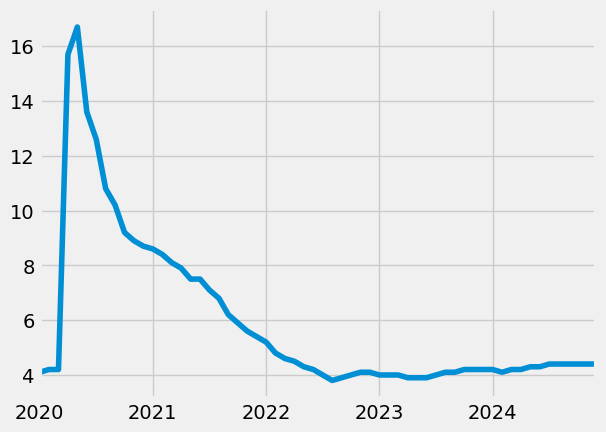

In [160]:
uemp_states.query('index >= 2020 and index <2025')['New York'].plot()

Text(0.5, 1.0, 'New York')

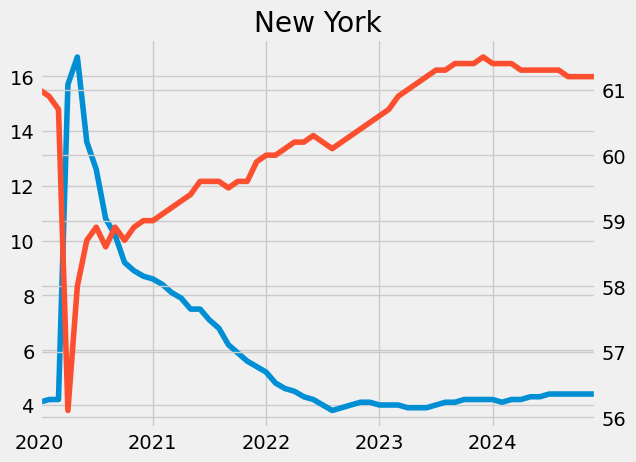

In [172]:
fig, ax = plt.subplots()
ax2 = ax.twinx() # Making a second axis with the first axis
uemp_states.query('index >= 2020 and index <2025')['New York'].plot(ax=ax, label = 'Unemployment')
part_states.query('index >= 2020 and index <2025')['New York'] \
.plot(ax=ax2, label = 'Participation', color=color_pal[1])
ax.set_title('New York')

In [174]:
# Now we can iterate over all the states

In [ ]:
uemp_states.rename(columns=

In [182]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

In [200]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

In [202]:
uemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas'],
      dtype='object')

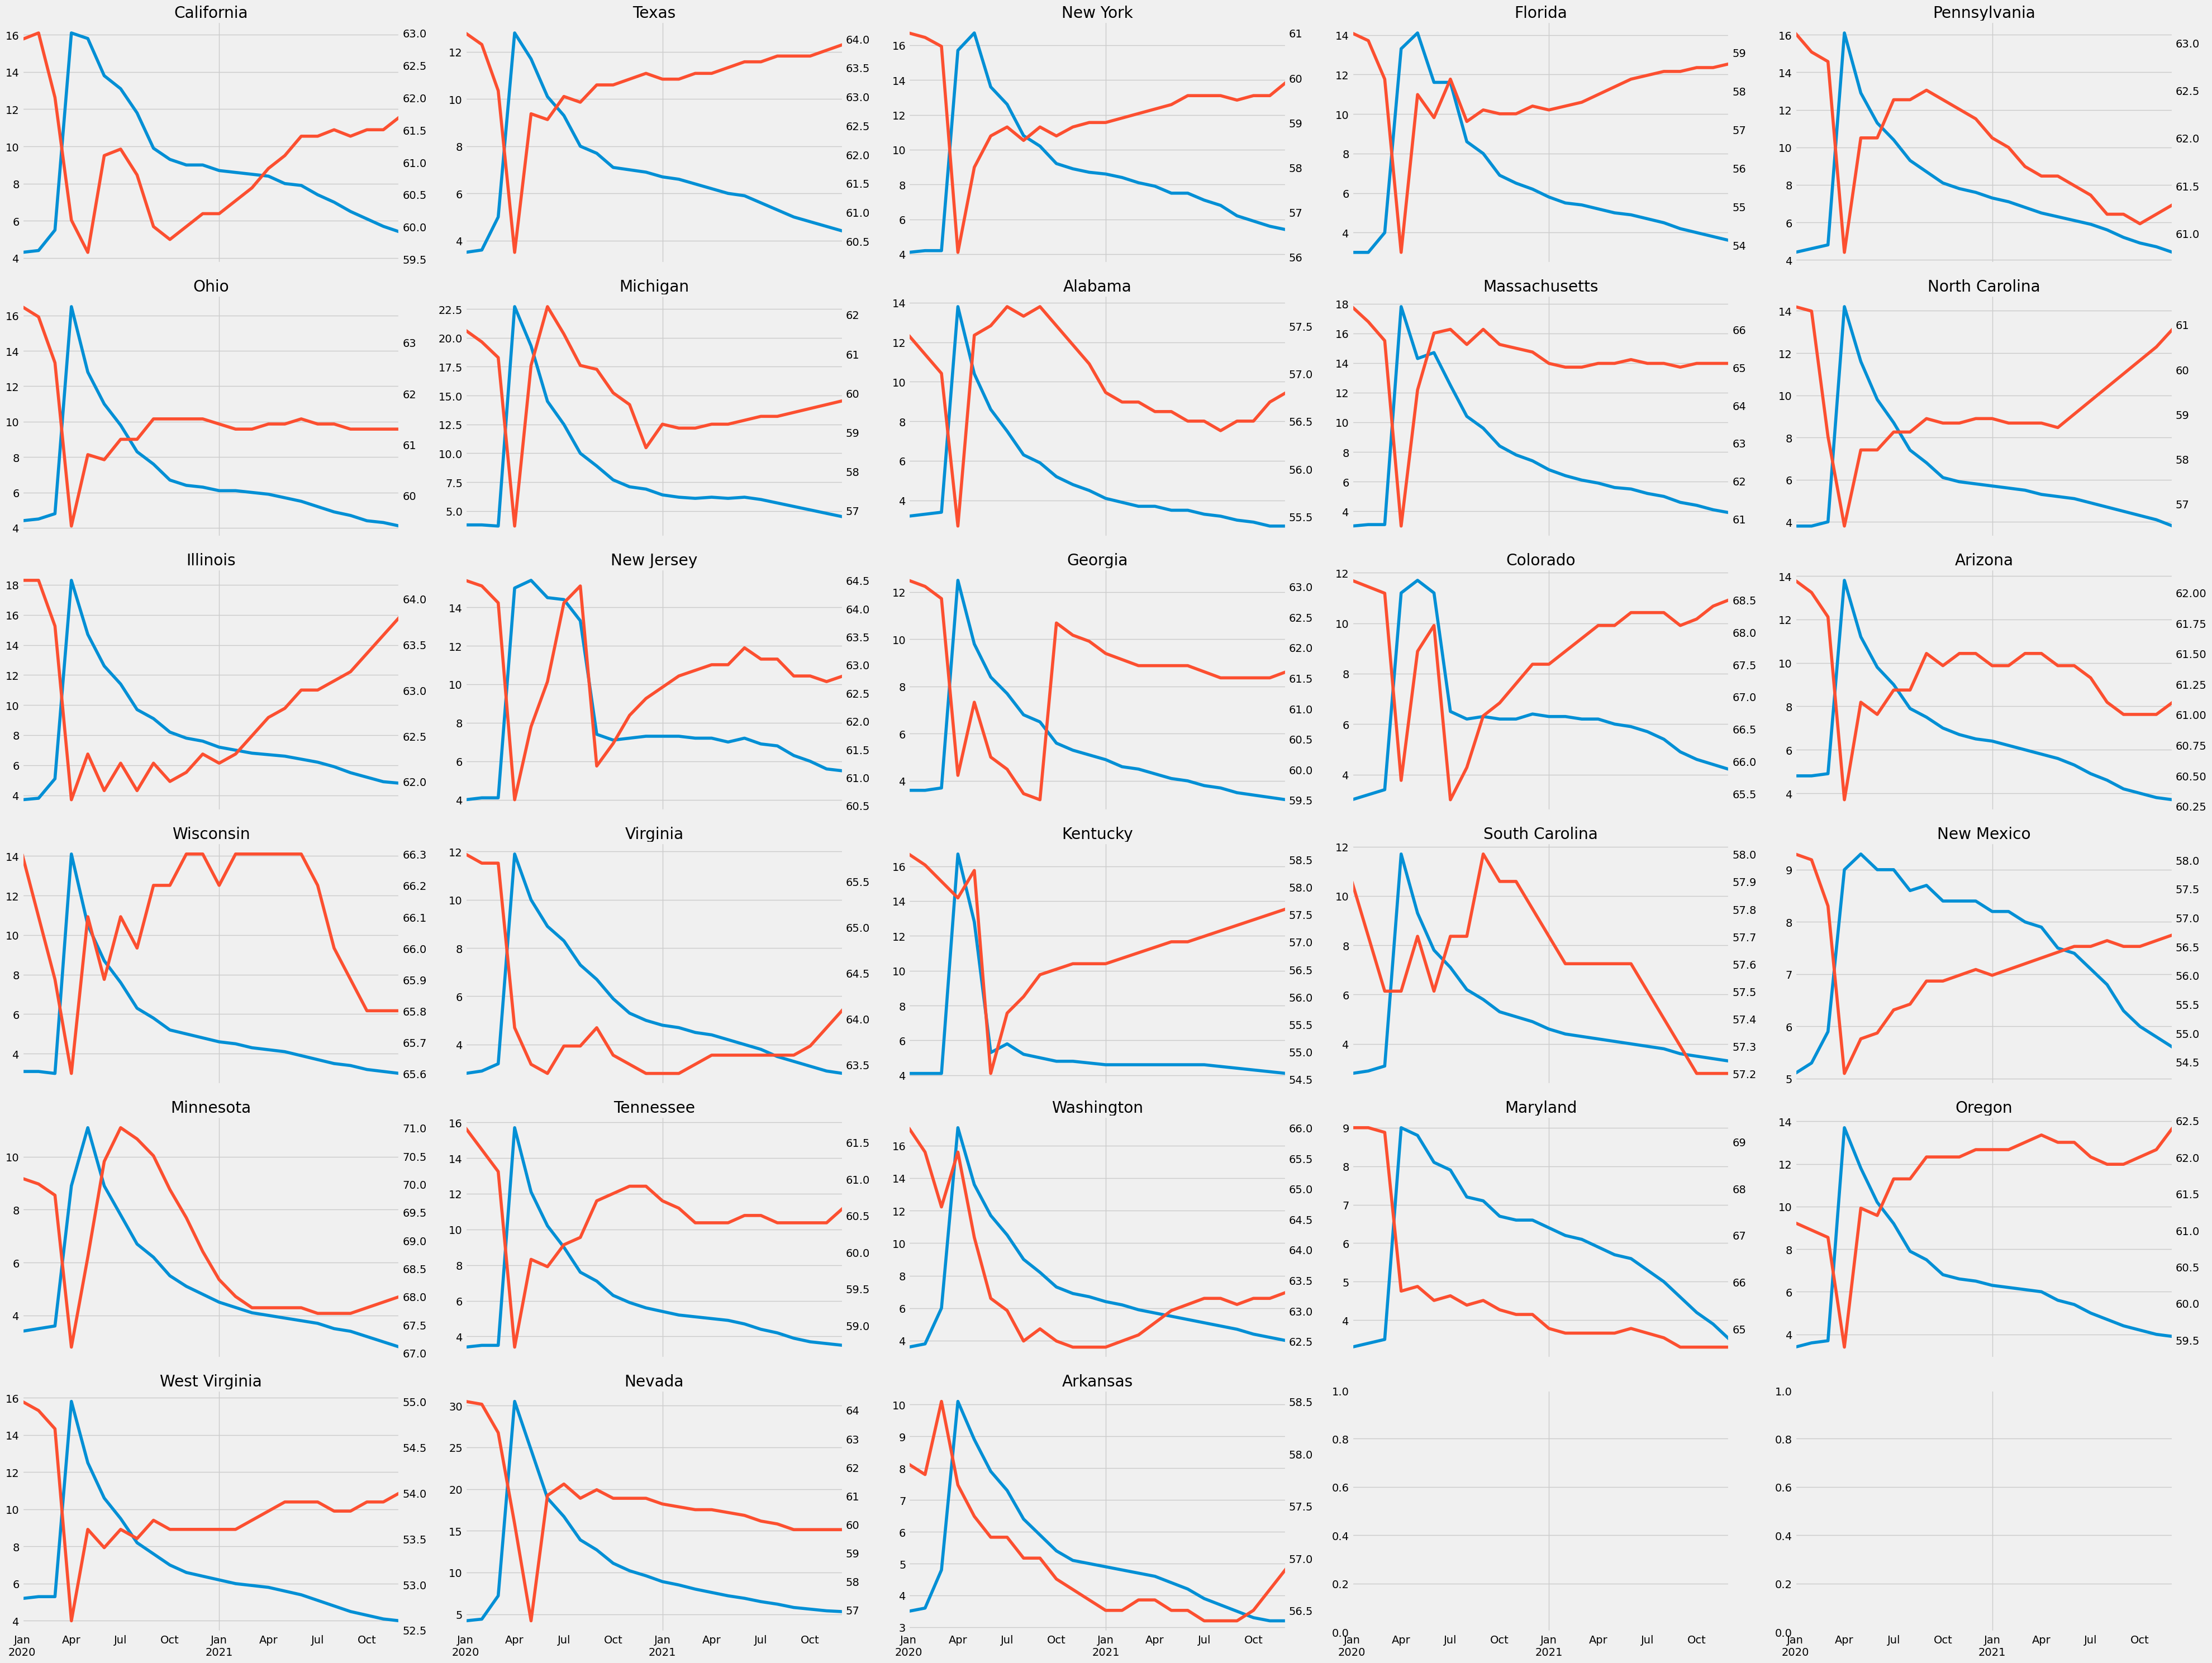

In [216]:
fig, axs = plt.subplots(6, 5, figsize=(40,30), sharex=True)
axs = axs.flatten()

i=0
for state in uemp_states.columns:    
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx() # Making a second axis with the first axis
    uemp_states.query('index >= 2020 and index <2022')[state].plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index <2022')[state] \
        .plot(ax=ax2, label = 'Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()
